In [72]:
import scipy.io as sio
import numpy as np

In [73]:
data = sio.loadmat('Mult-class Problem.mat')

In [74]:
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Training_data', 'Testing_data', 'Label_training', 'Label_testing'])


In [76]:
Trainting_data = np.array(data['Training_data'])
Testing_data = np.array(data['Testing_data'])
Label_training = np.array(data['Label_training'])
Label_testing = np.array(data['Label_testing'])
print('训练集大小:',Trainting_data.shape)
print('测试集大小:',Testing_data.shape)
print('训练集标签大小:',Label_training.shape)
print('测试集标签大小:',Label_testing.shape)
print(Label_testing)

训练集大小: (190, 10515)
测试集大小: (190, 10510)
训练集标签大小: (1, 10515)
测试集标签大小: (1, 10510)
[[ 1  1  1 ... 17 17 17]]


In [77]:
Label_training #看样子是17类分类问题

array([[ 1,  1,  1, ..., 17, 17, 17]], dtype=uint8)

In [78]:
class_lists = [[] for _ in range(17)]

In [79]:
for data,label in zip(Trainting_data.T,Label_training.T):
    class_lists[int(label) - 1].append(data)

In [80]:
a = class_lists[0][1].shape[0] #特征值的数量

In [81]:
def Covariance_matrix(X,X_mean): #计算协方差矩阵
    num = X.shape[1] 
    X_T = X.T
    X_T = [X_T[i, :].reshape(-1, 1) for i in range(X_T.shape[0])]
    X1 = [X[:,i] for i in range(X.shape[1])]
    X_sum = []
    for x, x_T in zip(X1, X_T):
        X_sum.append(x * x_T)
    return np.sum(X_sum,axis=0) / num - X_mean.reshape(X.shape[0],1) * X_mean.reshape(1,X.shape[0])

In [82]:
class_lists_mean = [] #均值
class_lists_cm = [] #协方差矩阵
for index , element in enumerate(class_lists):
    element = np.concatenate(element).reshape(a,-1)
    class_lists_mean.append(np.mean(element,axis=1))
    class_lists_cm.append(Covariance_matrix(element,class_lists_mean[index]))
    
    
        

欧式距离分类器

In [83]:
def gx1(X_test,X_mean): #欧氏距离
    x = X_test.reshape(-1,1) - X_mean.reshape(-1,1)
    return np.dot(x.T, x)

In [84]:
result = []
for data,label in zip(Testing_data.T,Label_testing.T):
    list = []
    for mean in class_lists_mean:
        list.append(gx1(data,mean))
    list = enumerate(list)
    list = sorted(list,key=lambda x: x[1])
    if int(list[0][0]) == label - 1:
        result.append(1)
    else:
        result.append(0)
        

In [85]:
num = len(result)
num1 = result.count(1)

In [86]:
print(num1/num)

0.2667935299714558


效果不是很好26.7%的准确率

马氏距离分类器

In [88]:
def gx2(X_test,X_mean,X_cm):#马氏距离
    x = X_test.reshape(-1, 1) - X_mean.reshape(-1, 1)
    return np.dot(np.dot(x.T,np.linalg.inv(X_cm)) , x)

In [89]:
result = []
for data,label in zip(Testing_data.T,Label_testing.T):
    list = []
    for mean,cm in zip(class_lists_mean,class_lists_cm):
        list.append(gx2(data,mean,cm))
    list = enumerate(list)
    list = sorted(list,key=lambda x: x[1])
    if int(list[0][0]) == label - 1:
        result.append(1)
    else:
        result.append(0)
        

KeyboardInterrupt: 

In [ ]:
num = len(result)
num1 = result.count(1)
print(num1/num)

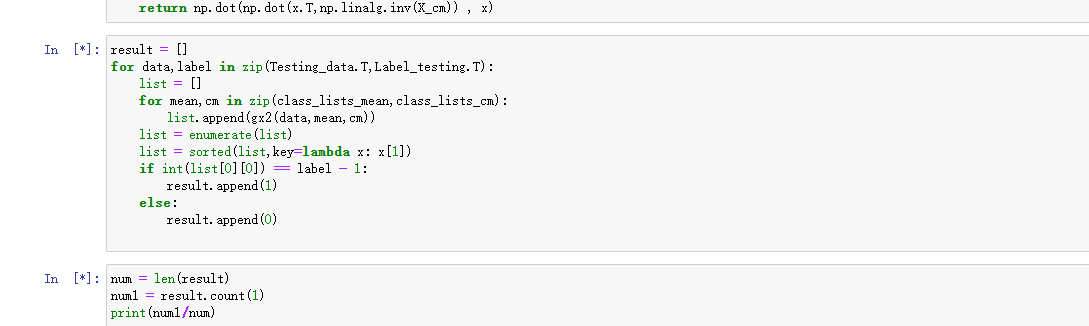

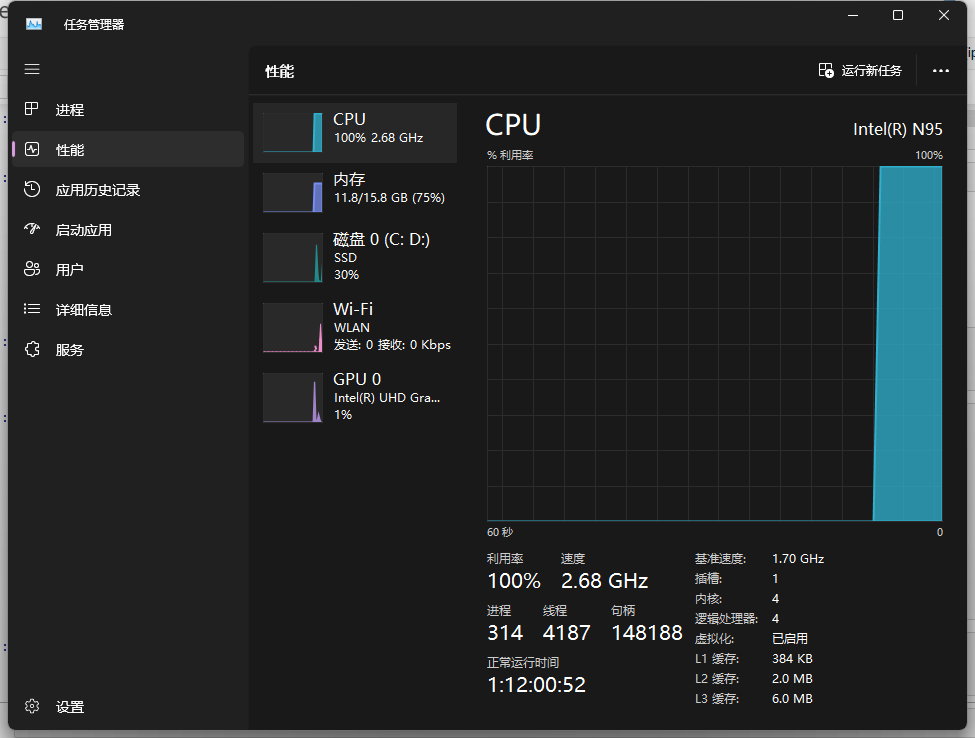

电脑拉跨，没跑出来，好电脑不在身边，改天试试